In [1]:
# to ignore the warnings 
import warnings
warnings.filterwarnings("ignore")

# Libraries 

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os 
import shutil
import math



from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16

from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten , Dense, Dropout , MaxPool2D

# Data Pre-Processing 

In [3]:
ROOT_DIR = "./garbage_classification"


image_classes = {}

for dir in os.listdir(ROOT_DIR):
    if dir != '.DS_Store':
        image_classes[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

image_classes

{'paper': 1050,
 'green-glass': 629,
 'clothes': 5325,
 'metal': 769,
 'cardboard': 891,
 'trash': 697,
 'biological': 986,
 'white-glass': 775,
 'battery': 946,
 'brown-glass': 608,
 'plastic': 865,
 'shoes': 1977}

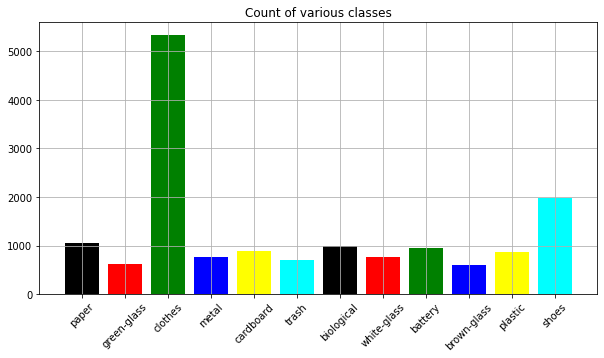

In [4]:
plt.figure(figsize=(10,5))
plt.bar(x = image_classes.keys(), height= image_classes.values(), color=['black', 'red', 'green', 'blue', 'yellow' ,'cyan'])
plt.title("Count of various classes")
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

As we see here its pretty clear that we have a average of 1000 images in each class... but the number of images in 'Cloths' class is slightly higher! we will randomly remove images to balance tha data 


In [5]:
# we create a training folder 

if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(ROOT_DIR):
    if dir != '.DS_Store':
      os.makedirs("./train/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) , 
                                  size= (math.floor(70/100*image_classes[dir])-5) , replace=False ):
        
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join('./train', dir)
        shutil.copy(O,D)
        os.remove(O)
else:
  print("Train Folder exsist")

In [6]:
# we create a Validation folder 

if not os.path.exists("./val"):
  os.mkdir("./val")

  for dir in os.listdir(ROOT_DIR):
    if dir != '.DS_Store':
      os.makedirs("./val/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) , 
                                  size= (math.floor(15/100*image_classes[dir])-5) , replace=False ):
        
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join('./val', dir)
        shutil.copy(O,D)
        os.remove(O)
else:
  print("Train Folder exsist")

In [7]:
# we create a test folder 

if not os.path.exists("./test"):
  os.mkdir("./test")

  for dir in os.listdir(ROOT_DIR):
    if dir != '.DS_Store':
      os.makedirs("./test/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) , 
                                  size= (math.floor(15/100*image_classes[dir])-5) , replace=False ):
        
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join('./test', dir)
        shutil.copy(O,D)
        os.remove(O)
else:
  print("Train Folder exsist")

In [8]:
train_path  = "./train"
valid_path  = "./val"
test_path   = "./test"

In [9]:
train_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , zoom_range= 0.2, horizontal_flip= True, shear_range= 0.2 , rescale= 1./255, featurewise_center= True,
    samplewise_center=True, featurewise_std_normalization=True,  samplewise_std_normalization=True,   rotation_range=45,  width_shift_range=0.4,  height_shift_range=0.4)

train = train_data_gen.flow_from_directory(directory= train_path , target_size=(224,224))

Found 10795 images belonging to 12 classes.


In [10]:
validation_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , rescale= 1./255 )

valid = validation_data_gen.flow_from_directory(directory= valid_path , target_size=(224,224))

Found 2261 images belonging to 12 classes.


In [11]:
test_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input, rescale= 1./255 )
test = train_data_gen.flow_from_directory(directory= test_path , target_size=(224,224), shuffle= False)

Found 2260 images belonging to 12 classes.


In [12]:
train.class_indices

{'battery': 0,
 'biological': 1,
 'brown-glass': 2,
 'cardboard': 3,
 'clothes': 4,
 'green-glass': 5,
 'metal': 6,
 'paper': 7,
 'plastic': 8,
 'shoes': 9,
 'trash': 10,
 'white-glass': 11}

In [13]:
t_img , label = train.next()

In [14]:
def plotImages(img_arr, label):

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


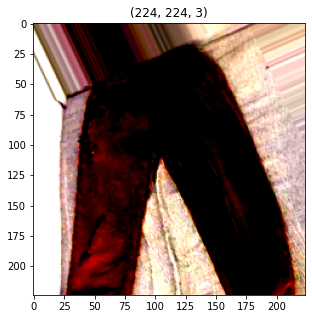

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


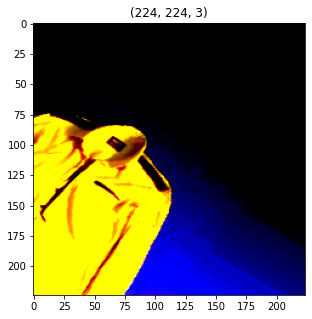

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


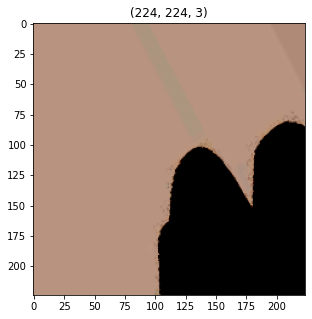

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


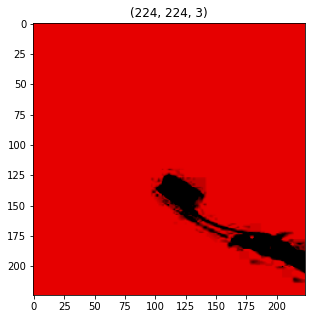

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


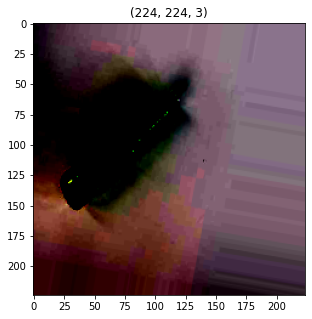

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


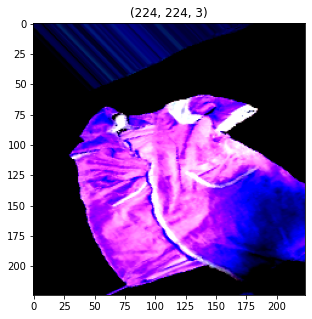

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


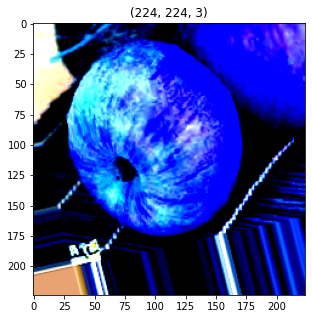

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


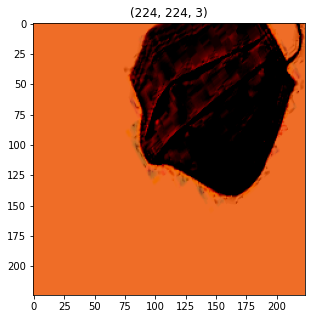

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


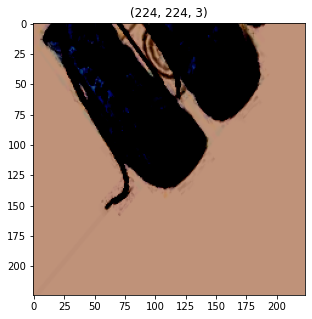

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


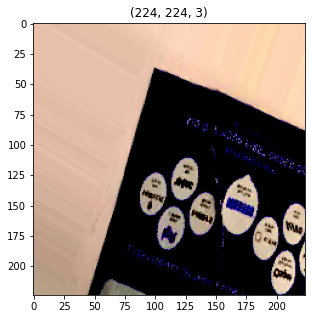

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


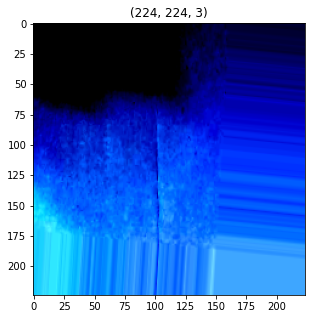

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


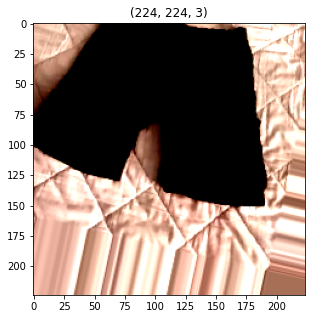

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


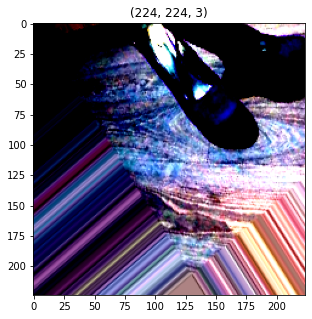

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


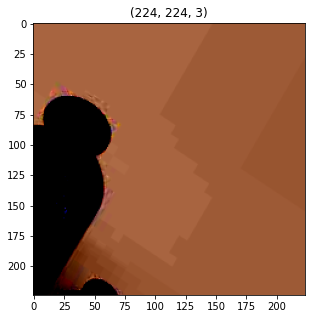

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


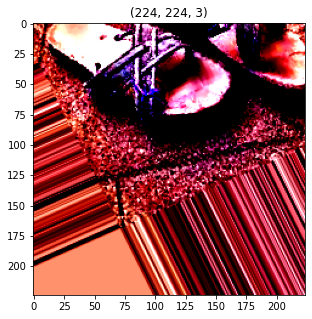

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


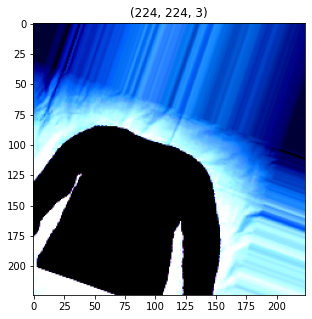

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


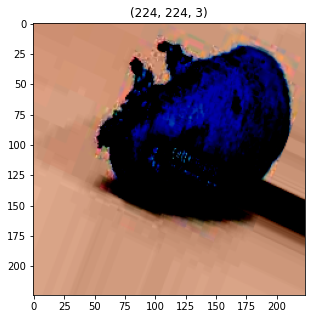

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


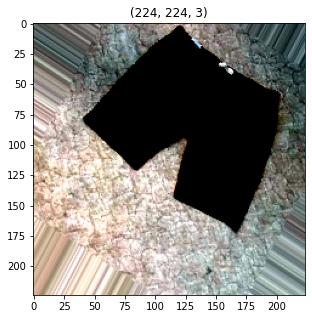

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


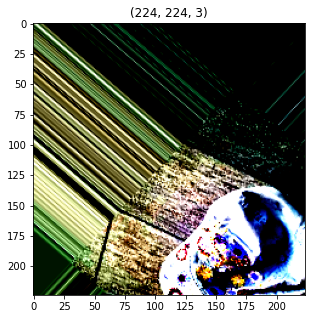

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


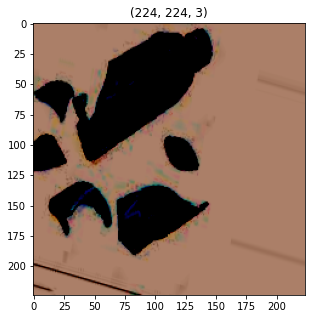

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


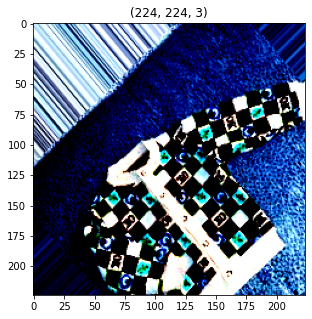

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


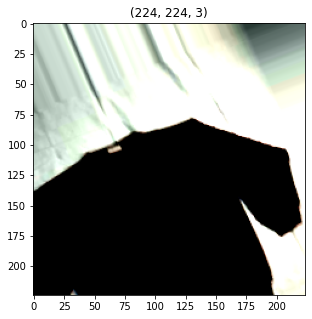

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


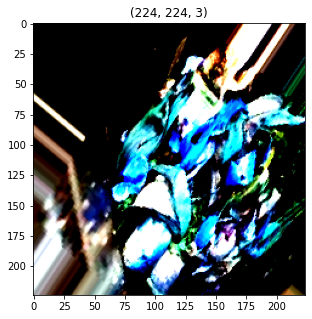

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


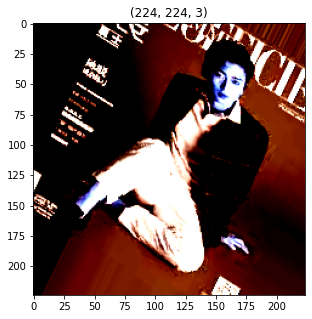

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


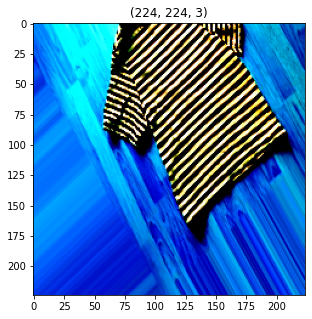

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


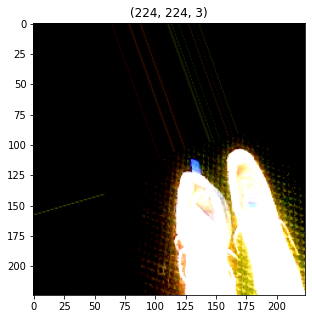

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


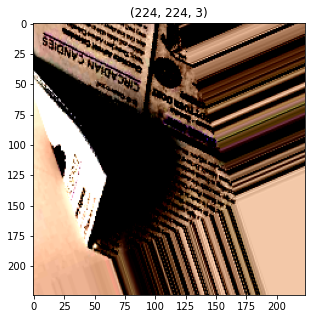

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


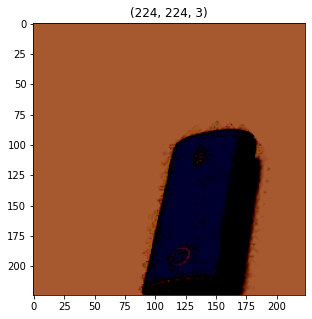

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


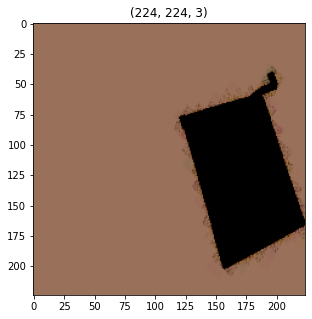

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


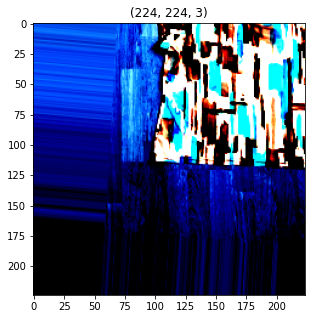

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


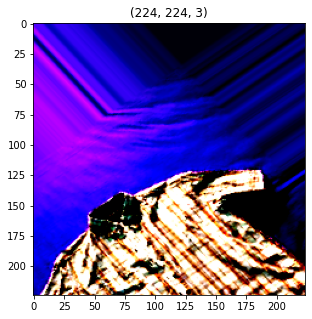

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


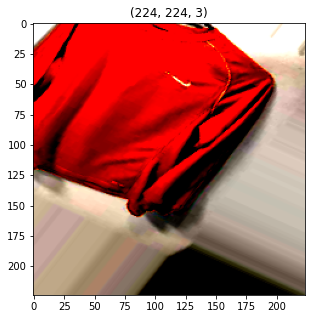

In [15]:
plotImages(t_img, label)

In [16]:
vgg = VGG16( input_shape=(224,224,3), include_top= False) # include_top will consider the new weights

2022-02-02 03:35:08.176799: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-02 03:35:08.176913: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [17]:
for layer in vgg.layers:           # Dont Train the parameters again 
  layer.trainable = False

In [18]:
x = Flatten()(vgg.output)
x = Dense(units= 12 , activation='softmax', name = 'predictions' )(x)

model = Model(vgg.input, x)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [21]:
# implementing early stopping and model check point 

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [22]:
hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= valid , validation_steps= 32, callbacks=[es,mc])

2022-02-02 03:35:08.835810: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-02 03:35:09.001745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 2.7873 - accuracy: 0.2969

2022-02-02 03:35:11.911748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy improved from -inf to 0.47168, saving model to bestmodel.h5
10/10 [==============================] - 11s 1s/step - loss: 2.7873 - accuracy: 0.2969 - val_loss: 2.1560 - val_accuracy: 0.4717
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 1.6734 - accuracy: 0.5969
Epoch 00002: val_accuracy did not improve from 0.47168
10/10 [==============================] - 10s 1s/step - loss: 1.6734 - accuracy: 0.5969 - val_loss: 1.6469 - val_accuracy: 0.4707
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 1.3698 - accuracy: 0.5688
Epoch 00003: val_accuracy improved from 0.47168 to 0.59180, saving model to bestmodel.h5
10/10 [==============================] - 10s 1s/step - loss: 1.3698 - accuracy: 0.5688 - val_loss: 1.3170 - val_accuracy: 0.5918
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 1.0572 - accuracy: 0.6656
Epoch 00004: val_accuracy improved from 0.59180 to 0.62305, saving model to bestmodel.h5
10/10 [====

In [23]:
## load only the best model 
from keras.models import load_model
model = load_model("bestmodel.h5")

In [24]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

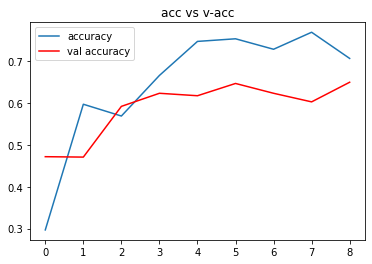

In [31]:
plt.plot(h['accuracy'] , label = 'accuracy')
plt.plot(h['val_accuracy'] , c = "red", label = 'val accuracy')
plt.title("acc vs v-acc")
plt.legend()
plt.show()

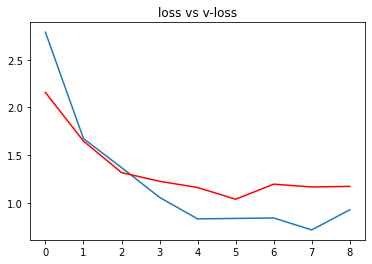

In [32]:
plt.plot(h['loss'] , label = 'loss')
plt.plot(h['val_loss'] , c = "red", label = 'val loss')
plt.title("loss vs v-loss")
plt.show()

In [33]:
# checking out the accurscy of our model 

acc = model.evaluate_generator(generator= test)[1] 

print(f"The accuracy of your model is = {acc} %")

The accuracy of your model is = 0.7190265655517578 %
